# <u>Capstone Project - The Battle of Neighborhood ( Week 2 )</u>

<b> IBM/Coursera </b>

<b> Capstone Project </b> <br> <i> Srinivasan Paramasivam </i>

### Table of Content

* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## <u>Introduction: Business Problem <a name="introduction"></a></u>

New York City's demographics show that it is a large and ethnically diverse metropolis. It is the largest city in the United States with a long history of international immigration. New York City was home to nearly 8.5 million people in 2014, accounting for over 40% of the population of New York State and a slightly lower percentage of the New York metropolitan area, home to approximately 23.6 million. Over the last decade the city has been growing faster than the region. The New York region continues to be by far the leading metropolitan gateway for legal immigrants admitted into the United States.

Throughout its history, New York City has been a major point of entry for immigrants; the term "melting pot" was coined to describe densely populated immigrant neighborhoods on the Lower East Side. As many as 800 languages are spoken in New York, making it the most linguistically diverse city in the world. English remains the most widely spoken language, although there are areas in the outer boroughs in which up to 25% of people speak English as an alternate language, and/or have limited or no English language fluency. English is least spoken in neighborhoods such as Flushing, Sunset Park, and Corona.

With it's diverse culture , comes diverse food items. There are many resturants in New york City, each beloning to different categories like Chinese , Indian , French etc.

So as part of this project , we will list and visualize all major parts of New York City that has great indian resturants.

## <u>Data <a name="data"></a></u>

<b>For this project we need the following data :</b>

>* New York City data that contains list Boroughs,Neighborhoods along with their latitude and longitude.

>* Data source : https://firebasestorage.googleapis.com/v0/b/trancy777.appspot.com/o/nyu_2451_34572-geojson.json?alt=media&token=2b568a29-f7b7-476e-9800-1cc930adaedb
>* Description : This data set contains the required information. And we will use this data set to explore various    neighborhoods of new york city. Indian resturants in each neighborhood of new york city.

>* Data source : Fousquare API
>* Description : By using this api we will get all the venues in each neighborhood. We can filter these venues to get only indian resturants.

>* Data source : https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
>* Description : By using this geo space data we will get the New york Borough boundaries that will help us visualize choropleth map.

# <u>Methodology</u> <a name="methodology">

>## <u>Approach <a name="approach"></a></u>

>> * Collect the new york city data from https://firebasestorage.googleapis.com/v0/b/trancy777.appspot.com/o/nyu_2451_34572-geojson.json?alt=media&token=2b568a29-f7b7-476e-9800-1cc930adaedb
>> * Using FourSquare API we will find all venues for each neighborhood.
>> * Filter out all venues that are Indian Resturants.
>> * Find rating , tips and like count for each Indian Resturants using FourSquare API.
>> * Using rating for each resturant , we will sort that data.
>> * Visualize the Ranking of neighborhoods using folium library(python)

>## <u>Questions that can be asked using the above mentioned datasets </u> <a name="question">

>>* What is best location in New York City for Indian Cuisine ?
>>* Which areas have potential Indian Resturant Market ?
>>* Which all areas lack Indian Resturants ?
>>* Which is the best place to stay if I prefer Indian Cuisine ?

## Analysis <a name="analysis">

>* Pandas and numpy for handling data.
>* Request module for using FourSquare API.
>* Geopy to get co-ordinates of City of New York.
>* Folium to visualize the results on a map

___

### Import Library

In [3]:
!pip install geocoder
!pip install folium
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
import geocoder
import os

import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported..')

     |████████████████████████████████| 102kB 15.3MB/s ta 0:00:01
     |████████████████████████████████| 92kB 11.9MB/s eta 0:00:01
Libraries imported..


<b>** Now we define a function to get the geocodes (latitude and longitude of a given location using geopy). </b>

In [4]:
def get_geo_location_of_address(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [5]:
CLIENT_ID = 'JQ5XM3ENC4G53LVX0TU01NXENH4QOLGVJSXAESR0F1TXJTMB'
CLIENT_SECRET = 'K2CRDYUAL0RNMHPZIKGZSHCAQNJSBMBLDZTV3L3JGZXOVCY2'
VERSION= '20191115'
radius=1000
LIMIT=100

<b><i> Creating get venue Function </i></b>

In [6]:
def get_all_venues(lat,lng):
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

<b><i> Creating Get venue details function </i> </b>

In [7]:
def get_all_venue_details(venue_id):
        
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

<b> <i> Creating New york city data get function </i></b>

<b> Note:</b> <i> Edited data table for Foursqure API calling limitations </i>

In [8]:
def get_new_york_city_data():
    #import json data file
    url='https://firebasestorage.googleapis.com/v0/b/trancy777.appspot.com/o/nyu_2451_34572-geojson.json?alt=media&token=2b568a29-f7b7-476e-9800-1cc930adaedb'
    resp=requests.get(url).json()
    features=resp['features']
    
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

<b><i> Call the above funtion to get the new york city data.</i> </b>

In [9]:
new_york_city_data=get_new_york_city_data()
new_york_city_data.head(10)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [10]:
new_york_city_data.shape

(101, 4)

<b> Shows Bar Plot </b>

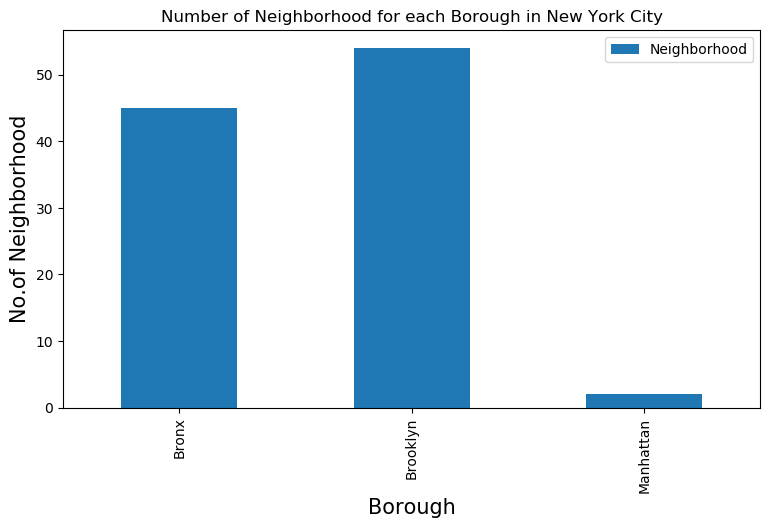

In [11]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Number of Neighborhood for each Borough in New York City')

plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of Neighborhood', fontsize=15)

new_york_city_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
plt.legend()
plt.show()

<b>Result:</b> <i> We see that Brooklyn has highest number of neighborhoods</i>

<b>Next Step:</b><i> Now we will collect Indian resturants for each Neighborhood</i>

In [13]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_city_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_all_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

In [14]:
indian_rest_ny.shape

(28, 4)

In [15]:
indian_rest_ny.head(10)

,Borough,Neighborhood,ID,Name
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot
1,Bronx,Norwood,57363fd4498eb703a5b5ea35,Aman Restaurant
2,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill
3,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine
4,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird
5,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill
6,Brooklyn,Bay Ridge,4b5a4dc8f964a520a2bb28e3,Taj Mahal
7,Brooklyn,Bay Ridge,545835a1498e820edc6f636f,Bombay Grill
8,Brooklyn,Brighton Beach,4af0d31bf964a5207ddf21e3,Pak Nasheman
9,Brooklyn,Flatbush,52213c4211d295d4c57a607c,Ashoka Grill


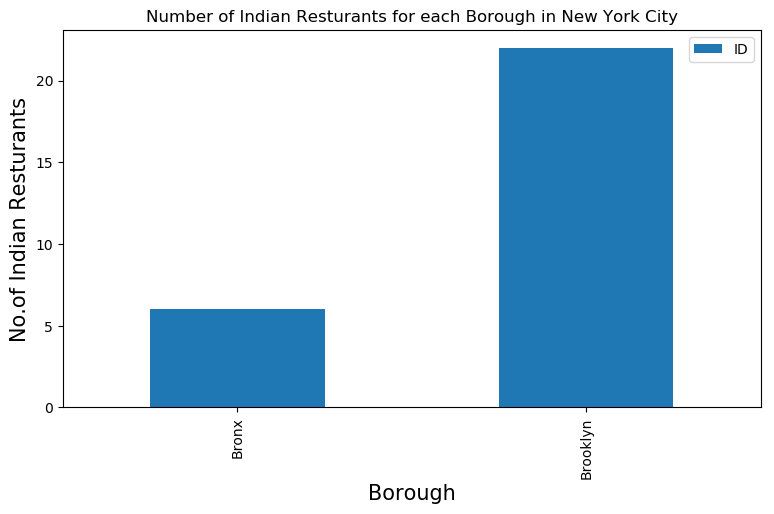

In [16]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Number of Indian Resturants for each Borough in New York City')

plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of Indian Resturants', fontsize=15)

indian_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
plt.legend()
plt.show()

<b> **We see that Brooklyn has the largest number of indian resturants </b>

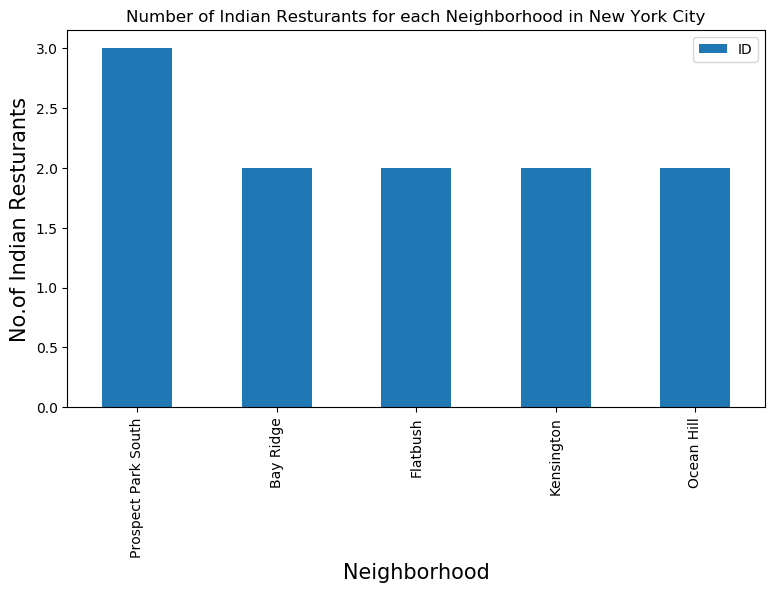

In [17]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Number of Indian Resturants for each Neighborhood in New York City')

plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No.of Indian Resturants', fontsize=15)

indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
plt.legend()
plt.show()

In [18]:
indian_rest_ny[indian_rest_ny['Neighborhood']=='Prospect Park South']

,Borough,Neighborhood,ID,Name
22,Brooklyn,Prospect Park South,519ff6c8498e1300ddcbd45c,Anarkali Indian Cuisine
23,Brooklyn,Prospect Park South,4db0f4371e729fcc56497f20,Mashallah
24,Brooklyn,Prospect Park South,4b718914f964a520c04b2de3,Madina Restaurant and Sweets


<b>So Prospect Park South in Brooklyn has the highest number of Indian Resturants with a total count of 3.</b>

<b> Next : </b></i>Now we will get the ranking of each resturant for further analysis.</i>

In [19]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1

for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_all_venue_details(ID)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        id,name,likes,rating,tips=[0]*5
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

No data available for id= 57363fd4498eb703a5b5ea35
No data available for id= 4f381772e4b08533d2f91e26


In [20]:
indian_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,8.0,11
1,Bronx,Norwood,0,0,0,0.0,0
2,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,5.9,2
3,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,6.0,9
4,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird,8,6.9,3


In [21]:
indian_rest_stats_ny.shape

(28, 7)

In [22]:
indian_rest_ny.shape

(28, 4)

<b> So we got data for all resturants Now lets save this data to a csv sheet. In case we by mistake modify it. As the number of calls to get details for venue are premium call and have limit of 500 per day, we will refer to saved data sheet csv if required </b>

In [23]:
indian_rest_stats_ny.to_csv('indian_rest_stats_ny.csv', index=False)

<b> Verify the data from saved csv data file </b>

In [24]:
indian_rest_stats_ny_csv=pd.read_csv('indian_rest_stats_ny.csv')
indian_rest_stats_ny_csv.shape

(28, 7)

In [25]:
indian_rest_stats_ny_csv.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,8.0,11
1,Bronx,Norwood,0,0,0,0.0,0
2,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,5.9,2
3,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,6.0,9
4,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird,8,6.9,3


In [26]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
Borough         28 non-null object
Neighborhood    28 non-null object
ID              28 non-null object
Name            28 non-null object
Likes           28 non-null object
Rating          28 non-null float64
Tips            28 non-null object
dtypes: float64(1), object(6)
memory usage: 1.6+ KB


In [27]:
indian_rest_stats_ny['Likes'] = indian_rest_stats_ny['Likes'].astype('float64')
indian_rest_stats_ny['Tips'] = indian_rest_stats_ny['Tips'].astype('float64')

In [28]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
Borough         28 non-null object
Neighborhood    28 non-null object
ID              28 non-null object
Name            28 non-null object
Likes           28 non-null float64
Rating          28 non-null float64
Tips            28 non-null float64
dtypes: float64(3), object(4)
memory usage: 1.6+ KB


In [29]:
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Likes'].idxmax]

Borough                         Brooklyn
Neighborhood                  North Side
ID              5631511b498e3d6d7e0a4df0
Name                  Tikka Indian Grill
Likes                                 94
Rating                               8.4
Tips                                  27
Name: 25, dtype: object

In [30]:
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Rating'].idxmax]

Borough                         Brooklyn
Neighborhood                 Fort Greene
ID              57596dad498e732300496b23
Name                         Dosa Royale
Likes                                 74
Rating                               8.7
Tips                                  22
Name: 15, dtype: object

In [31]:
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Tips'].idxmax]

Borough                           Brooklyn
Neighborhood     Prospect Lefferts Gardens
ID                4bb93b70cf2fc9b6fe64a002
Name            Gandhi Fine Indian Cuisine
Likes                                   81
Rating                                 8.3
Tips                                    47
Name: 17, dtype: object

In [32]:
ny_neighborhood_stats = indian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending = False).head(10)

,Neighborhood,Average Rating
3,Clinton Hill,8.70
7,Fort Greene,8.70
17,South Side,8.40
11,North Side,8.40
5,East Flatbush,8.20
20,Woodlawn,8.00
13,Ocean Hill,7.95
9,Gowanus,7.70
15,Prospect Lefferts Gardens,7.70
0,Bay Ridge,7.70


<b> Result :</b><i> We got Top Neighborhood with Top average ratings of Indian Resturants</i>

In [33]:
ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [34]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
1,Brooklyn,7.359091
0,Bronx,5.450000


<b> ** Similarly these are the average rating of Indian Resturants for each Borough </b>

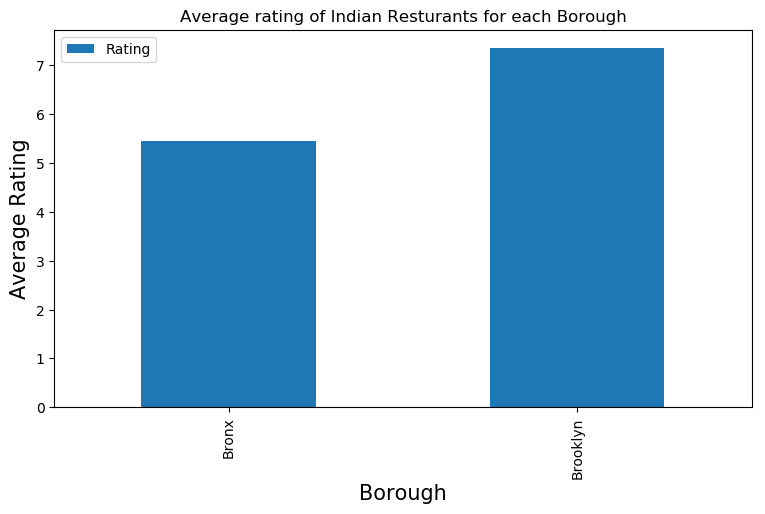

In [35]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Indian Resturants for each Borough')

plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')

plt.legend()
plt.show()

<b> We will consider all the neighborhoods with average rating greater or equal 8.0 to visualize on map </b>

In [36]:
ny_neighborhood_stats = ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
3,Clinton Hill,8.7
5,East Flatbush,8.2
7,Fort Greene,8.7
11,North Side,8.4
17,South Side,8.4
20,Woodlawn,8.0


In [37]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_city_data, on='Neighborhood')

In [38]:
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Brooklyn,Clinton Hill,40.693229,-73.967843,8.7
1,Brooklyn,East Flatbush,40.641718,-73.936103,8.2
2,Brooklyn,Fort Greene,40.688527,-73.972906,8.7
3,Brooklyn,North Side,40.714823,-73.958809,8.4
4,Brooklyn,South Side,40.710861,-73.958001,8.4
5,Bronx,Woodlawn,40.898273,-73.867315,8.0


In [39]:
ny_map = folium.Map(location=get_geo_location_of_address('New York'), zoom_start=12)

In [40]:
locations = folium.map.FeatureGroup()

for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    locations.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

<b> Add Label in Data Frame </b>

In [41]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [42]:
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add locations to map
ny_map.add_child(locations)

## <u>Results and Discussion</u> <a name="results">

Our analysis shows that although there is a great number of restaurants in New york city, there are pockets of low restaurant density fairly close to city South-east. Highest concentration of restaurants was detected north from Brooklyn, so we focused our attention to areas south, north-west and north, corresponding to boroughs Brooklyn, Bronx borough. 

Our attention was focused on Brooklyn & The Bronx which offer a combination of popularity among tourists, closeness to city center,River Side, strong socio-economic dynamics and a number of pockets of low restaurant density.

After directing our attention to this more narrow area of interest  we first created a dense grid of location candidates (spaced 500m appart); those locations were then filtered so that those with more than two restaurants in radius of 250m

Those location candidates were then clustered to create zones of interest which contain greatest number of location candidates. Addresses of centers of those zones were also generated using reverse geocoding to be used as markers/starting points for more detailed local analysis based on other factors.

Result of all this is 2 zones containing largest number of potential new restaurant locations based on number of and distance to existing venues - both restaurants in general and Indian restaurants particularly. This, of course, does not imply that those zones are actually optimal locations for a new restaurant! Purpose of this analysis was to only provide info on areas close to New york center but not crowded with existing restaurants - it is entirely possible that there is a very good reason for small number of restaurants in any of those areas, reasons which would make them unsuitable for a new restaurant regardless of lack of competition in the area. Recommended zones should therefore be considered only as a starting point for more detailed analysis which could eventually result in location which has not only no nearby competition but also other factors taken into account and all other relevant conditions met.

## <u>Conclusion</u> <a name="conclusion">

>* Fort Greene(Brooklyn), Clinton Hill(Brooklyn),  South Side(Brooklyn) are some of the best neighborhoods for indian cuisine.
>* Brooklyn have potential Indian Resturant Market
>* East Flatbush ranks last in average rating of Indian Resturants.
>* Brooklyn is the best place to stay if you prefer Indian Cuisine.